In [53]:
##Problem statement :In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn
%matplotlib inline

In [54]:
##Reading Data - EDA 

In [55]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [56]:
s_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [57]:
s_data.shape

(25, 2)

In [58]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [59]:
##Statistical analysis 
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


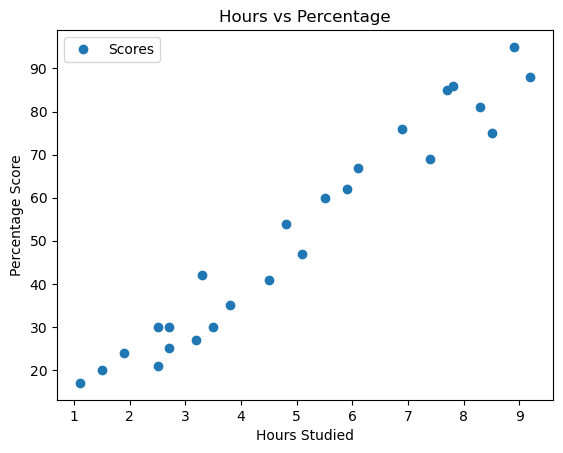

In [60]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage scored.

The relation Matrix


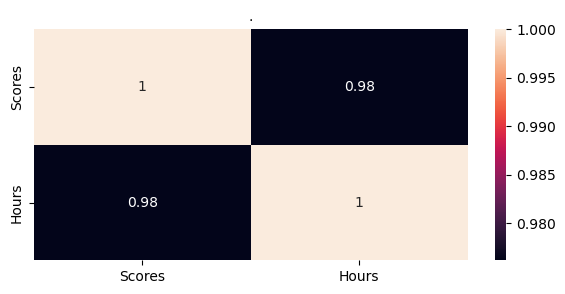

In [61]:
# Heatmap shows positive correlation between the Hours column and Scores column.
plt.figure(figsize=(7,3))
sns.heatmap(s_data[['Scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix')
plt.show()



In [62]:
X = s_data.iloc[:, :-1].values  ##hours of study :Independent Variable
y = s_data.iloc[:, 1].values  ##Score % :Dependent Variable 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [63]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [64]:
##Building the linear model and Training the algorithm

In [65]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [66]:
print("The coefficient is:")
regressor.coef_

The coefficient is:


array([9.94167834])

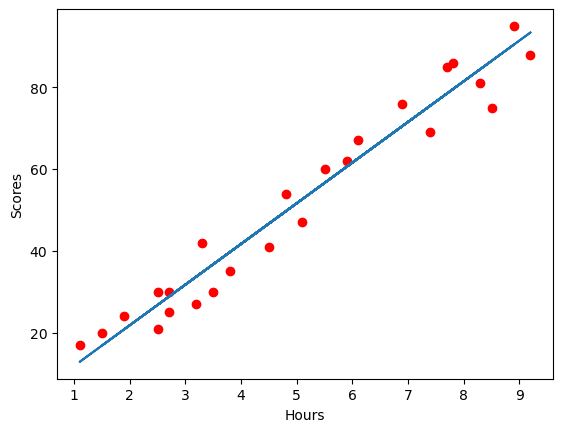

In [67]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'r')
plt.plot(X, line);
plt.xlabel(xlabel='Hours',fontsize=10)
plt.ylabel(ylabel='Scores',fontsize=10)
plt.show()
plt.show()

Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.


In [68]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores



[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [69]:
# Comparing Actual vs Predicted values
datafr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [70]:
# Testing the model to predict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


Evaluating the performance of the model

In [72]:
#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
R-2: 0.9367661043365055


Conclusion: R-2 gives the score of model fit and in this case we have R-2 = 0.9367661043365055 which is actually a great score for this model.
Also, We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 59). Here root mean squared error is less than 10% of the mean value of the percentages of all the student scores. Hence, it is safe to conclude the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.
    